# Exploratory Data Analysis

## Importing Libraries

In [1]:
# Importing possible needed libraries

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import ticker
from mpl_toolkits.mplot3d import Axes3D
from random import gauss
from scipy import stats
import seaborn as sns
from sklearn.linear_model import LinearRegression
from mpl_toolkits import mplot3d
import sklearn.metrics as metrics
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

import sys
import os
module_path = os.path.abspath(os.pardir)
if module_path not in sys.path:
    sys.path.append(module_path)

%matplotlib inline

from sklearn.svm import SVR
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.compose import ColumnTransformer
import sklearn.metrics as metrics
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
# Got this off Xiaohua Su code super useful
# Shows *all* columns in dataframe, i.e. does not truncate horizontally

pd.set_option('display.max_columns', None)

# Converts from scientific notation to standard form (applied to every df in
# this notebook) and rounds to two decimal places

pd.set_option('display.float_format', lambda x: '%.2f' % x)

## Importing Data set

In [3]:
# Importing data set using King's County data set through Pandas

df = pd.read_csv("data/kc_house_data.csv")

## Exploring data

In [4]:
# Running df head to see data set

df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.00,3,1.00,1180,5650,1.00,NaN,NONE,Average,7 Average,1180,0.0,1955,0.00,98178,47.51,-122.26,1340,5650
1,6414100192,12/9/2014,538000.00,3,2.25,2570,7242,2.00,NO,NONE,Average,7 Average,2170,400.0,1951,1991.00,98125,47.72,-122.32,1690,7639
2,5631500400,2/25/2015,180000.00,2,1.00,770,10000,1.00,NO,NONE,Average,6 Low Average,770,0.0,1933,nan,98028,47.74,-122.23,2720,8062
3,2487200875,12/9/2014,604000.00,4,3.00,1960,5000,1.00,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.00,98136,47.52,-122.39,1360,5000
4,1954400510,2/18/2015,510000.00,3,2.00,1680,8080,1.00,NO,NONE,Average,8 Good,1680,0.0,1987,0.00,98074,47.62,-122.05,1800,7503


In [5]:
# Running df describe to see statistical info

df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,17755.00,21597.00,21597.00,21597.00,21597.00,21597.00
mean,4580474287.77,540296.57,3.37,2.12,2080.32,15099.41,1.49,1788.60,1971.00,83.64,98077.95,47.56,-122.21,1986.62,12758.28
std,2876735715.75,367368.14,0.93,0.77,918.11,41412.64,0.54,827.76,29.38,399.95,53.51,0.14,0.14,685.23,27274.44
min,1000102.00,78000.00,1.00,0.50,370.00,520.00,1.00,370.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2123049175.00,322000.00,3.00,1.75,1430.00,5040.00,1.00,1190.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,3904930410.00,450000.00,3.00,2.25,1910.00,7618.00,1.50,1560.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,7308900490.00,645000.00,4.00,2.50,2550.00,10685.00,2.00,2210.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,9900000190.00,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,9410.00,2015.00,2015.00,98199.00,47.78,-121.31,6210.00,871200.00


In [6]:
# Running df info to see column names, datatypes and possible nulls

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [7]:
# Checking for null values
# Keeping and not removing null values because  the other data is still useful and the columns that contain the null values
# won't be used in analysis

df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [8]:
# Looking for duplicated data ID would be the only column where looking for duplicated data makes sense

df.duplicated().sum()
df['id'].duplicated().sum()

177

In [9]:
# Checking to see what IDs are duplicated

df['id'].value_counts()

795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
             ..
7812801125    1
4364700875    1
3021059276    1
880000205     1
1777500160    1
Name: id, Length: 21420, dtype: int64

In [10]:
# Looking at the differences in the columns of duplicated IDs
# Most recent sale date shows an increase

df.loc[(df['id'] == 795000620 ) | 
      (df['id'] == 1825069031)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3946,1825069031,8/14/2014,550000.00,4,1.75,2410,8447,2.00,NO,GOOD,Good,8 Good,2060,350.0,1936,1980.00,98074,47.65,-122.09,2520,14789
3947,1825069031,10/16/2014,550000.00,4,1.75,2410,8447,2.00,NaN,GOOD,Good,8 Good,2060,350.0,1936,1980.00,98074,47.65,-122.09,2520,14789
17588,795000620,9/24/2014,115000.00,3,1.00,1080,6250,1.00,NO,NONE,Fair,5 Fair,1080,0.0,1950,0.00,98168,47.50,-122.33,1070,6250
17589,795000620,12/15/2014,124000.00,3,1.00,1080,6250,1.00,NO,NONE,Fair,5 Fair,1080,0.0,1950,0.00,98168,47.50,-122.33,1070,6250
17590,795000620,3/11/2015,157000.00,3,1.00,1080,6250,1.00,NaN,NONE,Fair,5 Fair,1080,0.0,1950,nan,98168,47.50,-122.33,1070,6250


In [11]:
# checking the condition names

df['condition'].value_counts()

Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

## Data Cleaning

In [12]:
# Making a copy of the original data set so the original data set keeps its integrity

df_copy = df.copy()

In [13]:
# Running df copy to make sure it works

df_copy

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.00,3,1.00,1180,5650,1.00,NaN,NONE,Average,7 Average,1180,0.0,1955,0.00,98178,47.51,-122.26,1340,5650
1,6414100192,12/9/2014,538000.00,3,2.25,2570,7242,2.00,NO,NONE,Average,7 Average,2170,400.0,1951,1991.00,98125,47.72,-122.32,1690,7639
2,5631500400,2/25/2015,180000.00,2,1.00,770,10000,1.00,NO,NONE,Average,6 Low Average,770,0.0,1933,nan,98028,47.74,-122.23,2720,8062
3,2487200875,12/9/2014,604000.00,4,3.00,1960,5000,1.00,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.00,98136,47.52,-122.39,1360,5000
4,1954400510,2/18/2015,510000.00,3,2.00,1680,8080,1.00,NO,NONE,Average,8 Good,1680,0.0,1987,0.00,98074,47.62,-122.05,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.00,3,2.50,1530,1131,3.00,NO,NONE,Average,8 Good,1530,0.0,2009,0.00,98103,47.70,-122.35,1530,1509
21593,6600060120,2/23/2015,400000.00,4,2.50,2310,5813,2.00,NO,NONE,Average,8 Good,2310,0.0,2014,0.00,98146,47.51,-122.36,1830,7200
21594,1523300141,6/23/2014,402101.00,2,0.75,1020,1350,2.00,NO,NONE,Average,7 Average,1020,0.0,2009,0.00,98144,47.59,-122.30,1020,2007
21595,291310100,1/16/2015,400000.00,3,2.50,1600,2388,2.00,NaN,NONE,Average,8 Good,1600,0.0,2004,0.00,98027,47.53,-122.07,1410,1287


In [14]:
# dropping duplicate id's while keeping the most recent date

df_copy = df_copy.drop_duplicates(subset= ['id'], keep = "last")

In [15]:
# sanity check

df_copy['id'].duplicated().sum()

0

In [16]:
# Changing grade to only be a numerical for better analysis against price

df_copy['grade'] = df_copy["grade"].str.split(" ").str[0].astype('int64')

<ipython-input-16-553f432eaf74>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['grade'] = df_copy["grade"].str.split(" ").str[0].astype('int64')


In [17]:
#possible removing the 1 grade 3 and the 13  grade 13

df_copy["grade"].value_counts()

7     8889
8     6041
9     2606
6     1995
10    1130
11     396
5      234
12      88
4       27
13      13
3        1
Name: grade, dtype: int64

In [18]:
# Looking at the data of the three least common gradings, very high outliers will remove

df_copy.loc[(df_copy['grade'] == 13) | (df_copy['grade'] == 3) | (df_copy["grade"] == 4)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
350,7325600160,6/4/2014,299000.00,1,0.75,560,12120,1.00,NaN,NONE,Average,4,560,0.0,1967,0.00,98014,47.67,-121.85,1300,19207
465,8658300340,5/23/2014,80000.00,1,0.75,430,5050,1.00,NaN,NONE,Fair,4,430,0.0,1912,0.00,98014,47.65,-121.91,1200,7500
1065,3340401535,11/5/2014,140000.00,1,1.00,730,6890,1.00,NO,NONE,Good,4,730,0.0,1926,0.00,98055,47.47,-122.22,1790,7969
3220,2420069251,2/25/2015,262000.00,1,0.75,520,12981,1.00,NO,NONE,Very Good,3,520,0.0,1920,0.00,98022,47.21,-122.00,1340,12233
3578,1925069006,12/3/2014,355000.00,1,0.75,530,33278,1.00,NO,AVERAGE,Good,4,530,0.0,1950,0.00,98074,47.64,-122.08,2830,14311
3881,5279100625,4/29/2015,248000.00,2,1.00,770,8600,1.00,NO,NONE,Good,4,770,0.0,1914,nan,98027,47.53,-122.03,1420,6960
4407,2470100110,8/4/2014,5570000.00,5,5.75,9200,35069,2.00,NO,NONE,Average,13,6200,3000.0,2001,nan,98039,47.63,-122.23,3560,24345
4807,9831200500,3/4/2015,2480000.00,5,3.75,6810,7500,2.50,NO,NONE,Average,13,6110,700.0,1922,0.00,98102,47.63,-122.32,2660,7500
5199,4048400185,10/22/2014,352000.00,2,0.75,760,33801,1.00,NO,NONE,Good,4,760,0.0,1931,0.00,98059,47.47,-122.08,1100,39504
5446,7237501190,10/10/2014,1780000.00,4,3.25,4890,13402,2.00,NO,NONE,Average,13,4890,0.0,2004,0.00,98059,47.53,-122.13,5790,13539


In [19]:
# Removing grade 13,4, and 3 houses from dataset because of the small number of occurences and the price will skew data

df_copy = df_copy.loc[(df_copy['grade'] != 13) & (df_copy['grade'] != 3) & (df_copy["grade"] != 4)]

In [20]:
# sanity check on removal of houses

df_copy.loc[(df_copy['grade'] == 13) | (df_copy['grade'] == 3) | (df_copy["grade"] == 4)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [21]:
# sanity check

df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21379 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21379 non-null  int64  
 1   date           21379 non-null  object 
 2   price          21379 non-null  float64
 3   bedrooms       21379 non-null  int64  
 4   bathrooms      21379 non-null  float64
 5   sqft_living    21379 non-null  int64  
 6   sqft_lot       21379 non-null  int64  
 7   floors         21379 non-null  float64
 8   waterfront     19028 non-null  object 
 9   view           21316 non-null  object 
 10  condition      21379 non-null  object 
 11  grade          21379 non-null  int64  
 12  sqft_above     21379 non-null  int64  
 13  sqft_basement  21379 non-null  object 
 14  yr_built       21379 non-null  int64  
 15  yr_renovated   17577 non-null  float64
 16  zipcode        21379 non-null  int64  
 17  lat            21379 non-null  float64
 18  long  

In [22]:
# Changing the values to condition to numericals for easier data analysis where poor = 1, fair =2, etc.

df_copy["condition"] = df_copy["condition"].apply(lambda x: x.replace("Poor", '1'))
df_copy["condition"] = df_copy["condition"].apply(lambda x: x.replace("Fair", '2'))
df_copy["condition"] = df_copy["condition"].apply(lambda x: x.replace("Average", '3'))
df_copy["condition"] = df_copy["condition"].apply(lambda x: x.replace("Very Good", '5'))
df_copy["condition"] = df_copy["condition"].apply(lambda x: x.replace("Good", '4'))



In [23]:
#sanity check

df_copy['condition'].value_counts()

3    13877
4     5631
5     1686
2      158
1       27
Name: condition, dtype: int64

In [24]:
# Changing the string into an int

df_copy['condition'] = df_copy["condition"].astype("int64")

In [25]:
# sanity check

df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21379 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21379 non-null  int64  
 1   date           21379 non-null  object 
 2   price          21379 non-null  float64
 3   bedrooms       21379 non-null  int64  
 4   bathrooms      21379 non-null  float64
 5   sqft_living    21379 non-null  int64  
 6   sqft_lot       21379 non-null  int64  
 7   floors         21379 non-null  float64
 8   waterfront     19028 non-null  object 
 9   view           21316 non-null  object 
 10  condition      21379 non-null  int64  
 11  grade          21379 non-null  int64  
 12  sqft_above     21379 non-null  int64  
 13  sqft_basement  21379 non-null  object 
 14  yr_built       21379 non-null  int64  
 15  yr_renovated   17577 non-null  float64
 16  zipcode        21379 non-null  int64  
 17  lat            21379 non-null  float64
 18  long  

In [26]:
#  dropping the columns that won't be used in our analysis

df_clean = df_copy.drop(["id","date","waterfront", "view", 
             "sqft_basement", "yr_renovated"], axis = 1)

In [27]:
df_clean

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.00,3,1.00,1180,5650,1.00,3,7,1180,1955,98178,47.51,-122.26,1340,5650
1,538000.00,3,2.25,2570,7242,2.00,3,7,2170,1951,98125,47.72,-122.32,1690,7639
2,180000.00,2,1.00,770,10000,1.00,3,6,770,1933,98028,47.74,-122.23,2720,8062
3,604000.00,4,3.00,1960,5000,1.00,5,7,1050,1965,98136,47.52,-122.39,1360,5000
4,510000.00,3,2.00,1680,8080,1.00,3,8,1680,1987,98074,47.62,-122.05,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.00,3,2.50,1530,1131,3.00,3,8,1530,2009,98103,47.70,-122.35,1530,1509
21593,400000.00,4,2.50,2310,5813,2.00,3,8,2310,2014,98146,47.51,-122.36,1830,7200
21594,402101.00,2,0.75,1020,1350,2.00,3,7,1020,2009,98144,47.59,-122.30,1020,2007
21595,400000.00,3,2.50,1600,2388,2.00,3,8,1600,2004,98027,47.53,-122.07,1410,1287


## Exploring data

In [28]:
# Look at the statistics of our clean data set

df_clean.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
count,21379.00,21379.00,21379.00,21379.00,21379.00,21379.00,21379.00,21379.00,21379.00,21379.00,21379.00,21379.00,21379.00,21379.00,21379.00
mean,540364.18,3.38,2.12,2081.69,15119.57,1.50,3.41,7.66,1790.05,1971.14,98077.88,47.56,-122.21,1987.82,12767.84
std,356587.73,0.92,0.76,907.17,41564.43,0.54,0.65,1.16,820.95,29.37,53.46,0.14,0.14,683.31,27362.87
min,78000.00,1.00,0.50,370.00,520.00,1.00,1.00,5.00,370.00,1900.00,98001.00,47.16,-122.52,399.00,651.00
25%,324950.00,3.00,1.75,1430.00,5040.00,1.00,3.00,7.00,1200.00,1952.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,451000.00,3.00,2.25,1920.00,7609.00,1.50,3.00,7.00,1560.00,1975.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,645000.00,4.00,2.50,2550.00,10660.00,2.00,4.00,8.00,2220.00,1997.00,98117.00,47.68,-122.12,2370.00,10080.00
max,7060000.00,33.00,8.00,13540.00,1651359.00,3.50,5.00,12.00,9410.00,2015.00,98199.00,47.78,-121.31,6210.00,871200.00


<AxesSubplot:xlabel='price'>

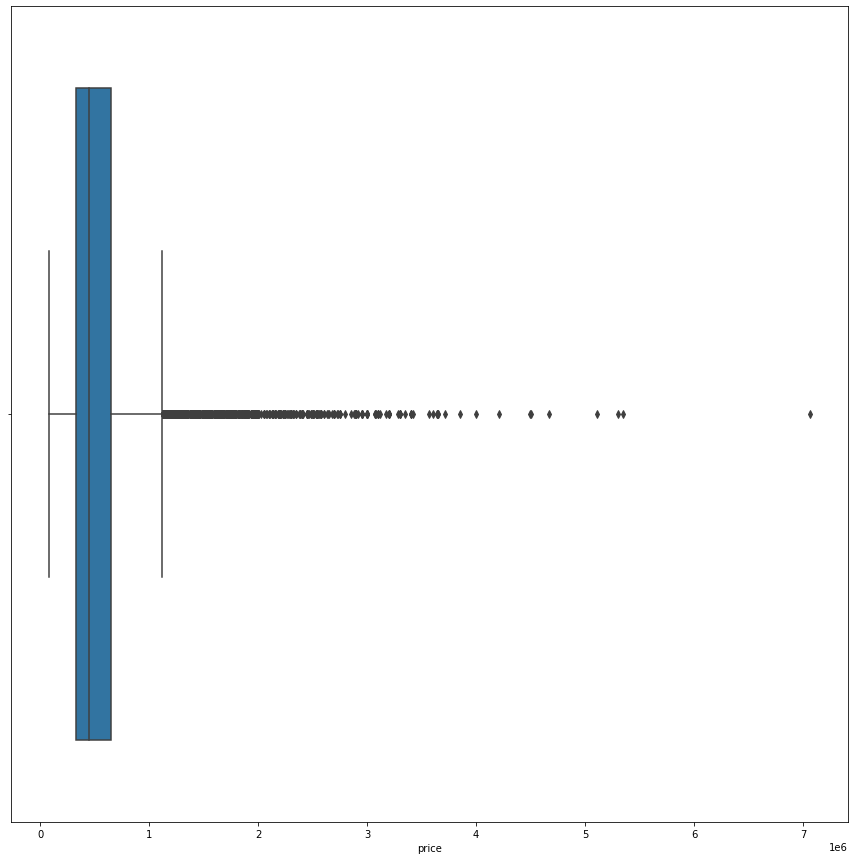

In [29]:
# boxplot of price
# thinking about getting rid of the outlier

fig, ax = plt.subplots(figsize = (15, 15))
sns.boxplot(x= df_clean["price"])

In [30]:
# Finding cut-off point: `price` IQR with mean price
q3, q1 = np.percentile(df_clean['price'], [75, 25])
q3, q1
iqr = q3-q1

lower_limit = df_clean['price'].mean()- (iqr*1.5)

upper_limit = df_clean['price'].mean()+ (iqr*1.5)

lower_limit, upper_limit

(60289.17704289255, 1020439.1770428926)

In [31]:
#using median
q3, q1 = np.percentile(df_clean['price'], [75, 25])
q3, q1
iqr = q3-q1

lower_limit2 = df_clean['price'].median()- (iqr*1.5)

upper_limit2 = df_clean['price'].median()+ (iqr*1.5)

lower_limit2, upper_limit2

(-29075.0, 931075.0)

In [32]:
# limit the range of the pricing to the mean 75% quartile range

df_clean = df_clean[df_clean['price'] < upper_limit]

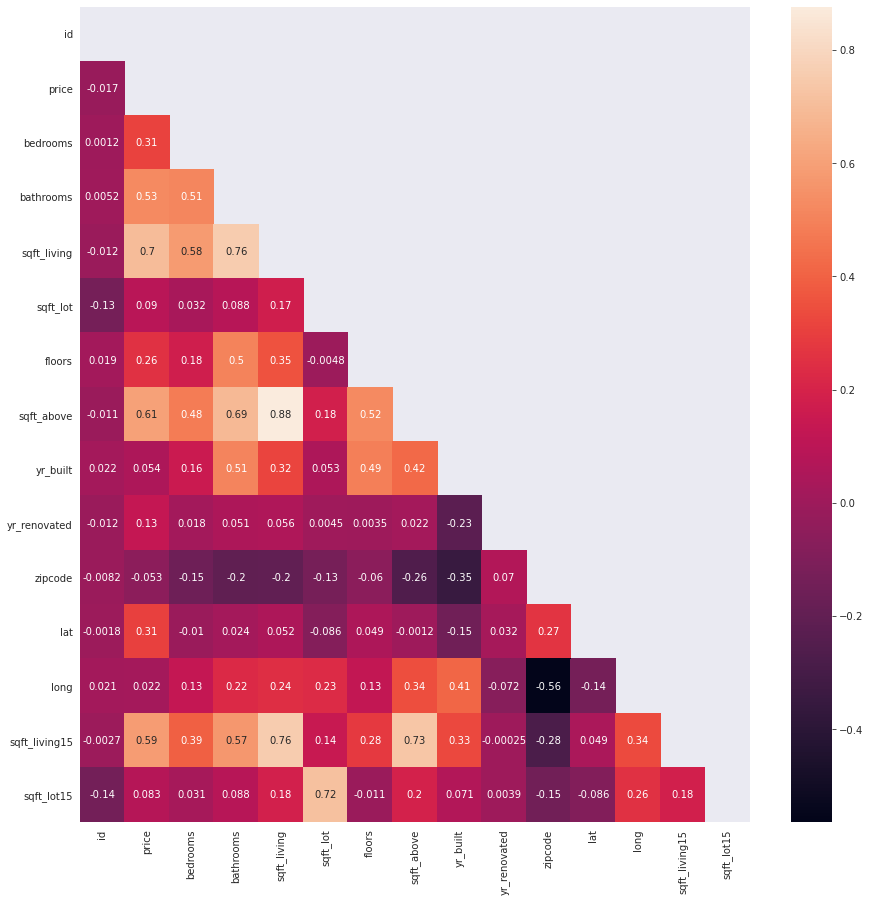

In [33]:
# original heat map with no changes

with sns.axes_style('darkgrid'):
    
    f, ax = plt.subplots(figsize=(15,15))
    
    mask = np.zeros_like(df.corr(), dtype = bool)
    
    mask[np.triu_indices_from(mask)] = True
    
    sns.heatmap(df.corr(), annot=True, mask=mask);

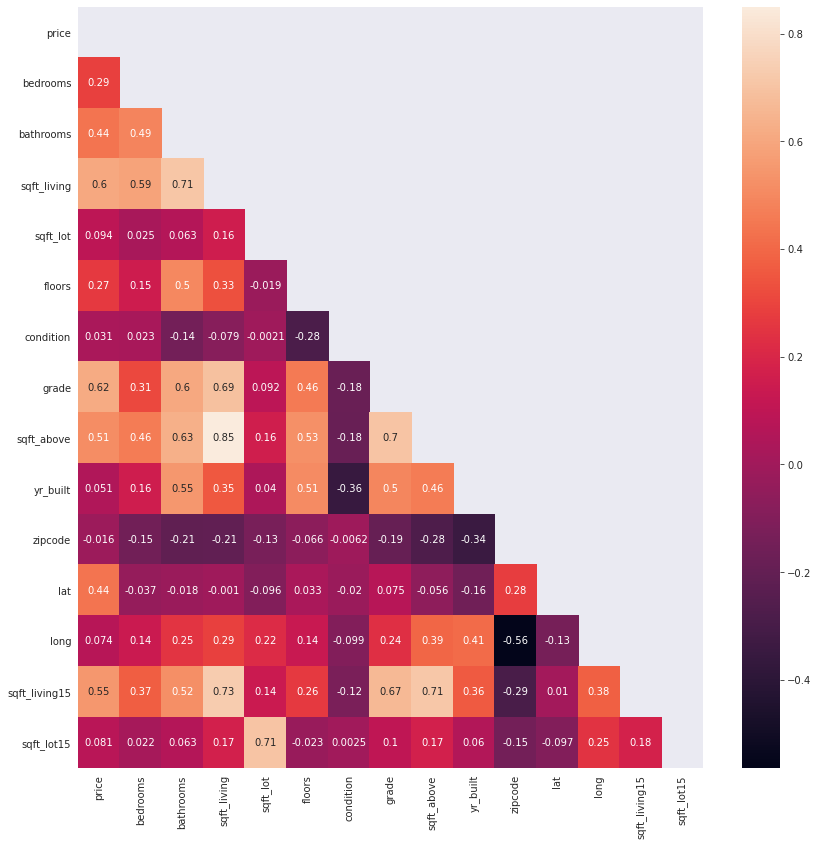

In [34]:
# new heatmap with changes

with sns.axes_style('darkgrid'):
    
    f, ax = plt.subplots(figsize=(14,14))
    
    mask = np.zeros_like(df_clean.corr(), dtype = bool)
    
    mask[np.triu_indices_from(mask)] = True
    
    sns.heatmap(df_clean.corr(), annot=True, mask=mask);

In [76]:
y = df_clean['price']
X = df_clean.drop(labels='price',
                 axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, np.log(y), 
                                                   test_size = .25,
                                                   random_state = 42)

lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_train, y_train)

0.8272930615703111

In [109]:
X

,index,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,x0_98001,x0_98002,x0_98003,x0_98004,x0_98005,x0_98006,x0_98007,x0_98008,x0_98010,x0_98011,x0_98014,x0_98019,x0_98022,x0_98023,x0_98024,x0_98027,x0_98028,x0_98029,x0_98030,x0_98031,x0_98032,x0_98033,x0_98034,x0_98038,x0_98039,x0_98040,x0_98042,x0_98045,x0_98052,x0_98053,x0_98055,x0_98056,x0_98058,x0_98059,x0_98065,x0_98070,x0_98072,x0_98074,x0_98075,x0_98077,x0_98092,x0_98102,x0_98103,x0_98105,x0_98106,x0_98107,x0_98108,x0_98109,x0_98112,x0_98115,x0_98116,x0_98117,x0_98118,x0_98119,x0_98122,x0_98125,x0_98126,x0_98133,x0_98136,x0_98144,x0_98146,x0_98148,x0_98155,x0_98166,x0_98168,x0_98177,x0_98178,x0_98188,x0_98198,x0_98199
0,0,1.10,0.00,7.07,5650,1.00,3,7,7.07,1955,98178,47.51,-122.26,1340,5650,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
1,1,1.10,0.81,7.85,7242,2.00,3,7,7.68,1951,98125,47.72,-122.32,1690,7639,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,2,0.69,0.00,6.65,10000,1.00,3,6,6.65,1933,98028,47.74,-122.23,2720,8062,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,3,1.39,1.10,7.58,5000,1.00,5,7,6.96,1965,98136,47.52,-122.39,1360,5000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,4,1.10,0.69,7.43,8080,1.00,3,8,7.43,1987,98074,47.62,-122.05,1800,7503,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19976,21592,1.10,0.81,7.41,1131,3.00,3,8,7.41,2009,98103,47.70,-122.35,1530,1509,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
19977,21593,0.69,0.41,7.03,5813,2.00,3,8,6.81,2014,98146,47.51,-122.36,1830,7200,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0

In [130]:
lr.score(X_test, y_test)

0.8279573070553978

In [132]:
model_simple = LinearRegression()
scores_simple = cross_validate(
                    model_simple, X_train, y_train, cv=5, 
                    return_train_score=True
)
print(f"""train scores: {scores_simple['train_score']},
      test scores: {scores_simple['test_score']}""")
np.mean(scores_simple['train_score']), np.std(scores_simple['train_score'])


train scores: [0.83092264 0.82371695 0.82838371 0.82655023 0.82818873],
      test scores: [0.81122707 0.83928478 0.82106747 0.82913019 0.82231565]


(0.8275524532342932, 0.0023735867071306713)

In [133]:
np.mean(scores_simple['test_score']), np.std(scores_simple['test_score'])

(0.8246050305305495, 0.009302661476794554)

In [75]:
df_clean_corr = df_clean.corr()["price"].map(abs).sort_values(ascending = False)
df_clean_corr

price           1.00
grade           0.62
sqft_living     0.60
sqft_living15   0.55
sqft_above      0.51
                ... 
x0_98028        0.01
x0_98011        0.01
x0_98024        0.00
x0_98070        0.00
x0_98034        0.00
Name: price, Length: 86, dtype: float64

In [95]:
lr_rfe = LinearRegression()
select = RFE(lr_rfe, n_features_to_select = 3)
ss = StandardScaler()
ss.fit(df_clean.drop('price', axis =1))

df_clean_scaled = ss.transform(df_clean.drop('price', axis = 1))

In [96]:
select.fit(X=df_clean_scaled, y = df_clean["price"])

RFE(estimator=LinearRegression(), n_features_to_select=3)

In [97]:
select.support_

array([False, False, False,  True, False, False, False,  True, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])

In [98]:
df_clean.drop(['price'], axis =1 )

,index,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,x0_98001,x0_98002,x0_98003,x0_98004,x0_98005,x0_98006,x0_98007,x0_98008,x0_98010,x0_98011,x0_98014,x0_98019,x0_98022,x0_98023,x0_98024,x0_98027,x0_98028,x0_98029,x0_98030,x0_98031,x0_98032,x0_98033,x0_98034,x0_98038,x0_98039,x0_98040,x0_98042,x0_98045,x0_98052,x0_98053,x0_98055,x0_98056,x0_98058,x0_98059,x0_98065,x0_98070,x0_98072,x0_98074,x0_98075,x0_98077,x0_98092,x0_98102,x0_98103,x0_98105,x0_98106,x0_98107,x0_98108,x0_98109,x0_98112,x0_98115,x0_98116,x0_98117,x0_98118,x0_98119,x0_98122,x0_98125,x0_98126,x0_98133,x0_98136,x0_98144,x0_98146,x0_98148,x0_98155,x0_98166,x0_98168,x0_98177,x0_98178,x0_98188,x0_98198,x0_98199
0,0,3,1.00,1180,5650,1.00,3,7,1180,1955,98178,47.51,-122.26,1340,5650,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
1,1,3,2.25,2570,7242,2.00,3,7,2170,1951,98125,47.72,-122.32,1690,7639,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,2,2,1.00,770,10000,1.00,3,6,770,1933,98028,47.74,-122.23,2720,8062,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,3,4,3.00,1960,5000,1.00,5,7,1050,1965,98136,47.52,-122.39,1360,5000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,4,3,2.00,1680,8080,1.00,3,8,1680,1987,98074,47.62,-122.05,1800,7503,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19976,21592,3,2.50,1530,1131,3.00,3,8,1530,2009,98103,47.70,-122.35,1530,1509,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
19977,21593,4,2.50,2310,5813,2.00,3,8,2310,2014,98146,47.51,-122.36,1830,7200,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00

In [99]:
house_preds = df_clean[['sqft_living', "grade", 'yr_built']]
house_target = df_clean['price']
lr = LinearRegression()
lr.fit(house_preds, house_target)
lr.score(house_preds,house_target)

0.5274704607406986

In [100]:
X = df_clean.drop('price', axis = 1)
y = df_clean.price

lr = LinearRegression()
lr.fit(X,y)
                  
y_hat= lr.predict(X)
sse = sum((y-y_hat)**2)
mse = sse/len(y)
rmse = np.sqrt(mse)

print(rmse)
print(np.sqrt(mean_squared_error(y, y_hat)))

83389.69953435194
83389.69953435197


In [80]:
# Making a log for certian features

df_log = df_clean.copy()

In [81]:
df_log['bedrooms'] = np.log(df["bedrooms"])

In [82]:
df_log['bathrooms'] = np.log(df["bathrooms"])

In [83]:
df_log["sqft_living"] = np.log(df["sqft_living"])

In [84]:
df_log["sqft_above"] =  np.log(df["sqft_above"])

In [85]:
df_log

,index,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,x0_98001,x0_98002,x0_98003,x0_98004,x0_98005,x0_98006,x0_98007,x0_98008,x0_98010,x0_98011,x0_98014,x0_98019,x0_98022,x0_98023,x0_98024,x0_98027,x0_98028,x0_98029,x0_98030,x0_98031,x0_98032,x0_98033,x0_98034,x0_98038,x0_98039,x0_98040,x0_98042,x0_98045,x0_98052,x0_98053,x0_98055,x0_98056,x0_98058,x0_98059,x0_98065,x0_98070,x0_98072,x0_98074,x0_98075,x0_98077,x0_98092,x0_98102,x0_98103,x0_98105,x0_98106,x0_98107,x0_98108,x0_98109,x0_98112,x0_98115,x0_98116,x0_98117,x0_98118,x0_98119,x0_98122,x0_98125,x0_98126,x0_98133,x0_98136,x0_98144,x0_98146,x0_98148,x0_98155,x0_98166,x0_98168,x0_98177,x0_98178,x0_98188,x0_98198,x0_98199
0,0,221900.00,1.10,0.00,7.07,5650,1.00,3,7,7.07,1955,98178,47.51,-122.26,1340,5650,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
1,1,538000.00,1.10,0.81,7.85,7242,2.00,3,7,7.68,1951,98125,47.72,-122.32,1690,7639,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,2,180000.00,0.69,0.00,6.65,10000,1.00,3,6,6.65,1933,98028,47.74,-122.23,2720,8062,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,3,604000.00,1.39,1.10,7.58,5000,1.00,5,7,6.96,1965,98136,47.52,-122.39,1360,5000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,4,510000.00,1.10,0.69,7.43,8080,1.00,3,8,7.43,1987,98074,47.62,-122.05,1800,7503,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19976,21592,360000.00,1.10,0.81,7.41,1131,3.00,3,8,7.41,2009,98103,47.70,-122.35,1530,1509,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
19977,21593,400000.00,0.69,0.41,7.03,5813,2.00,3,8,6.81,2014,98146,47.51,-122.36,1830,7200,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0

In [104]:
y = df_log['price']
X = df_log.drop(labels='price',
                 axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, np.log(y), 
                                                   test_size = .25,
                                                   random_state = 42)

lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_train, y_train)

0.7810741479356181

In [105]:
lr.score(X_test, y_test)

0.7767472454023496

In [93]:
X = df_clean.drop(['price'], axis =1)
y= df_clean.price

X_train, X_test, y_train, y_test = train_test_split(
                                                X,
                                                y,
                                                test_size=0.25,
                                                random_state=42
)

In [108]:
poly_3 = PolynomialFeatures(2)
X_poly3 = poly_3.fit_transform(X_train)

model_poly3 = LinearRegression()
scores_complex3 = cross_validate(
                                model_poly3, X_poly3, y_train, cv = 5, 
                                return_train_score = True)
print(f"""train scores: {scores_complex3["train_score"]},
    test scores: {scores_complex3['test_score']}""")

train scores: [0.85582505 0.85073618 0.85408598 0.85109086 0.8514455 ],
    test scores: [0.77744455 0.71895082 0.77811287 0.81612953 0.81512089]


In [107]:
np.mean(scores_complex3['test_score']), np.std(scores_complex3["test_score"])

(0.3331710436784429, 0.44540741019545926)

In [59]:
#Define target 'y'(dependendent variable) and features 'X'(independent variables or predictors).
y = df_clean['price']
X = df_clean.drop('price',axis=1)
#Test each continus variable as a standalone linear regression.
col_names = X.select_dtypes('int64').columns
results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value' ]]
for idx, val in enumerate(col_names):
    print ("Selling price~" + val)
    print ("------------------------------")

    f = 'price~' + val
    model = sm.formula.ols(formula=f, data=df_clean).fit()
    X_new = pd.DataFrame({val: [X[val].min(), X[val].max()]});
    preds = model.predict(X_new)
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1] ])
    print(results[idx+1])


Selling price~bedrooms
------------------------------
['bedrooms', 0.0824051238725978, 262433.10710047116, 62640.74606604077, 0.0]
Selling price~sqft_living
------------------------------
['sqft_living', 0.3642683456553948, 161929.43064848846, 157.43042662492348, 0.0]
Selling price~sqft_lot
------------------------------
['sqft_lot', 0.00883787492121213, 464083.0021304898, 0.4619326400005546, 1.8345588339088125e-40]
Selling price~condition
------------------------------
['condition', 0.0009899808130955368, 438019.29799331527, 9623.377077483841, 8.651838793674122e-06]
Selling price~grade
------------------------------
['grade', 0.380126738244864, -438045.14849791705, 120886.79913685015, 0.0]
Selling price~sqft_above
------------------------------
['sqft_above', 0.26469249850565135, 228962.60404761805, 142.41059495426006, 0.0]
Selling price~yr_built
------------------------------
['yr_built', 0.002608811869946104, -211050.61560028163, 345.9651317539307, 5.042690423487899e-13]
Selling pri

In [60]:
df_clean = df_clean.reset_index()

In [61]:
encoder = OneHotEncoder()
# apply on df
# color_1hot = encoder.fit_transform(df_clean["zipcode"].values.reshape(-1,1))
# color_1hot_df = pd.DataFrame(color_1hot.toarray())
# df_clean = pd.concat([df_clean.drop('zipcode', axis = 1), color_1hot_df], axis = 1)
zipcode_trans = encoder.fit_transform(df_clean['zipcode'].values.reshape(-1,1))
zipcode_trans.todense()
encoder.get_feature_names()
zipcode_df =pd.DataFrame(zipcode_trans.todense(), columns = encoder.get_feature_names())
zipcode_df
df_clean = df_clean.join(zipcode_df)

In [67]:
endog = df_clean["price"]
exog = sm.add_constant(df_clean.drop(['price', 'zipcode'], axis =1))
lin_reg_model = sm.OLS(endog, exog)
lin_reg_model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     1102.
Date:                Tue, 10 May 2022   Prob (F-statistic):               0.00
Time:                        13:40:40   Log-Likelihood:            -2.5476e+05
No. Observations:               19981   AIC:                         5.097e+05
Df Residuals:                   19897   BIC:                         5.104e+05
Df Model:                          83                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.424e+07   3.25e+06     -4.376      0.000   -2.06e+07   -7.86e+06
index             0.2363      0.099      2.399      0.016       0.043       0.429
bedrooms      -4436.6785    852.749     -5.203      0.000   -6108.137   -2765.220
bathrooms      1.657e+04   1457.723     11.365      0.000    1.37e+04    1.94e+04
sqft_living      66.7956      2.076     32.181      0.000      62.727      70.864
sqft_lot          0.3000      0.021     14.290      0.000       0.259       0.341
floors        -1.354e+04   1744.066     -7.765      0.000    -1.7e+04   -1.01e+04
condition       2.18e+04   1035.328     21.057      0.000    1.98e+04    2.38e+04
grade          4.459e+04   1030.127     43.283      0.000    4.26e+04    4.66e+04
sqft_above       38.3979      2.099     18.293      0.000      34.283      42.512
yr_built       -682.4751     34.388    -19.846      0.000    -749.878    -615.072
lat            1.489e+05   3.42e+04      4.356      0.000    8.19e+04    2.16e+05
long          -6.954e+04   2.43e+04     -2.858      0.004   -1.17e+05   -2.18e+04
sqft_living15    42.0640      1.687     24.937      0.000      38.758      45.370
sqft_lot15        0.0122      0.033      0.367      0.713      -0.053       0.077
x0_98001      -3.487e+05   4.51e+04     -7.729      0.000   -4.37e+05    -2.6e+05
x0_98002      -3.389e+05    4.4e+04     -7.706      0.000   -4.25e+05   -2.53e+05
x0_98003      -3.561e+05   4.61e+04     -7.723      0.000   -4.47e+05   -2.66e+05
x0_98004       8.951e+04   4.77e+04      1.878      0.060   -3925.343    1.83e+05
x0_98005      -7.161e+04   4.69e+04     -1.526      0.127   -1.64e+05    2.04e+04
x0_98006      -1.158e+05   4.55e+04     -2.547      0.011   -2.05e+05   -2.67e+04
x0_98007      -1.405e+05   4.65e+04     -3.023      0.003   -2.32e+05   -4.94e+04
x0_98008      -1.446e+05   4.58e+04     -3.159      0.002   -2.34e+05   -5.49e+04
x0_98010      -2.501e+05      4e+04     -6.257      0.000   -3.28e+05   -1.72e+05
x0_98011      -2.726e+05      5e+04     -5.447      0.000   -3.71e+05   -1.74e+05
x0_98014      -2.676e+05   4.22e+04     -6.343      0.000    -3.5e+05   -1.85e+05
x0_98019      -2.941e+05   4.51e+04     -6.516      0.000   -3.83e+05   -2.06e+05
x0_98022      -3.046e+05   3.82e+04     -7.971      0.000    -3.8e+05    -2.3e+05
x0_98023      -3.791e+05   4.72e+04     -8.034      0.000   -4.72e+05   -2.87e+05
x0_98024      -2.148e+05   4.15e+04     -5.173      0.000   -2.96e+05   -1.33e+05
x0_98027      -1.814e+05   4.27e+04     -4.248      0.000   -2.65e+05   -9.77e+04
x0_98028      -2.829e+05   5.08e+04     -5.568      0.000   -3.82e+05   -1.83e+05
x0_98029      -1.448e+05   4.26e+04     -3.401      0.001   -2.28e+05   -6.13e+04
x0_98030      -3.497e+05    4.4e+04     -7.953      0.000   -4.36e+05   -2.64e+05
x0_98031      -3.506e+05   4.43e+04     -7.911   

In [65]:
df_clean

,index,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,x0_98001,x0_98002,x0_98003,x0_98004,x0_98005,x0_98006,x0_98007,x0_98008,x0_98010,x0_98011,x0_98014,x0_98019,x0_98022,x0_98023,x0_98024,x0_98027,x0_98028,x0_98029,x0_98030,x0_98031,x0_98032,x0_98033,x0_98034,x0_98038,x0_98039,x0_98040,x0_98042,x0_98045,x0_98052,x0_98053,x0_98055,x0_98056,x0_98058,x0_98059,x0_98065,x0_98070,x0_98072,x0_98074,x0_98075,x0_98077,x0_98092,x0_98102,x0_98103,x0_98105,x0_98106,x0_98107,x0_98108,x0_98109,x0_98112,x0_98115,x0_98116,x0_98117,x0_98118,x0_98119,x0_98122,x0_98125,x0_98126,x0_98133,x0_98136,x0_98144,x0_98146,x0_98148,x0_98155,x0_98166,x0_98168,x0_98177,x0_98178,x0_98188,x0_98198,x0_98199
0,0,221900.00,3,1.00,1180,5650,1.00,3,7,1180,1955,98178,47.51,-122.26,1340,5650,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
1,1,538000.00,3,2.25,2570,7242,2.00,3,7,2170,1951,98125,47.72,-122.32,1690,7639,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,2,180000.00,2,1.00,770,10000,1.00,3,6,770,1933,98028,47.74,-122.23,2720,8062,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,3,604000.00,4,3.00,1960,5000,1.00,5,7,1050,1965,98136,47.52,-122.39,1360,5000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,4,510000.00,3,2.00,1680,8080,1.00,3,8,1680,1987,98074,47.62,-122.05,1800,7503,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19976,21592,360000.00,3,2.50,1530,1131,3.00,3,8,1530,2009,98103,47.70,-122.35,1530,1509,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
19977,21593,400000.00,4,2.50,2310,5813,2.00,3,8,2310,2014,98146,47.51,-122.36,1830,7200,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00

In [66]:
df_log.isna()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
21593,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
21594,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
21595,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [122]:
y = df_clean['price']
X = df_clean.drop(labels='price',
                 axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, np.log(y), 
                                                   test_size = .25,
                                                   random_state = 42)

lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_train, y_train)

0.8272930615703111

In [128]:
from sklearn.model_selection import cross_validate, ShuffleSplit

baseline_model = LinearRegression()


splitter = ShuffleSplit(n_splits=3, test_size=0.75, random_state=0)
baseline_scores = cross_validate(
    estimator=baseline_model,
    X=X_train,
    y=y_train,
    return_train_score=True,
    cv=splitter
)
print(baseline_scores)

{'fit_time': array([0.04438829, 0.01296544, 0.01283193]), 'score_time': array([0.00498629, 0.004987  , 0.004987  ]), 'test_score': array([0.82764215, 0.820263  , 0.81927486]), 'train_score': array([0.81692173, 0.83821579, 0.83535112])}


In [129]:
print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Train score:      0.8301628817043415
Validation score: 0.822393337945095


In [131]:
lr.score(X_test, y_test)

0.8279573070553978